In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

n=9
ciudades=[ i for i in range(n)]
arcos=[(i,j) for i in ciudades for j in ciudades if i!=j]
ciudades

#rnd=np.random
#rnd.seed(0)
#coord_x=rnd.rand(n)*100
#coord_y=rnd.rand(n)*100
coord_x=[49,52,20,40,21,17,31,52,51]
coord_y=[49,64,26,30,47,63,62,33,21]

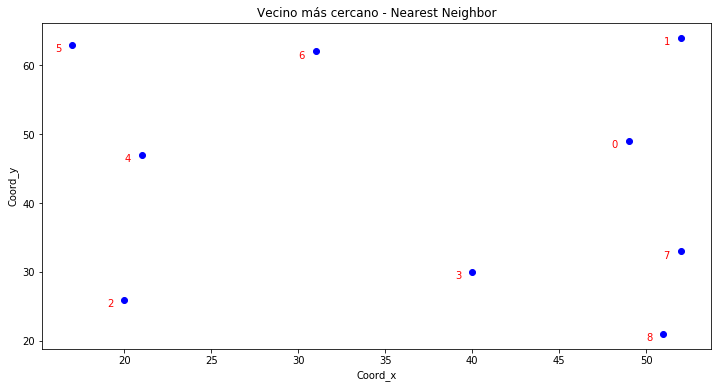

In [8]:
# Graficar

x=coord_x
y=coord_y
plt.figure(figsize=(12,6))
plt.scatter(x,y,color="blue")
plt.xlabel("Coord_x")
plt.ylabel("Coord_y")
plt.title("Vecino más cercano - Nearest Neighbor")

for i in range(len(x)):
    plt.annotate(str(i), xy=(x[i],y[i]),xytext=(x[i]-1,y[i]-1),color='red')
plt.show()

In [9]:
distancia = {(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i, j in arcos}
starting_node=0

NN=[starting_node]

while len(NN)<n:
    k=NN[-1] 
    print(k)
    nn={(k,j): distancia[(k,j)] for j in ciudades if k!=j and j not in NN}
    new=min(nn.items(), key=lambda x:x[1])
    print(new)
    
    NN.append(new[0][1])

NN.append(starting_node)
print(NN)

0
((0, 1), 15.297058540778355)
1
((1, 6), 21.095023109728988)
6
((6, 5), 14.035668847618199)
5
((5, 4), 16.492422502470642)
4
((4, 2), 21.02379604162864)
2
((2, 3), 20.396078054371138)
3
((3, 7), 12.36931687685298)
7
((7, 8), 12.041594578792296)
[0, 1, 6, 5, 4, 2, 3, 7, 8, 0]


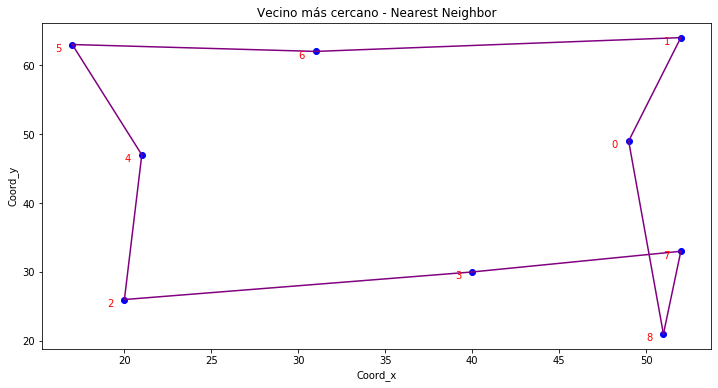

[0, 1, 6, 5, 4, 2, 3, 7, 8, 0]


In [10]:
x=coord_x
y=coord_y
plt.figure(figsize=(12,6))
plt.scatter(x,y,color="blue")
for i in range(len(x)):
    plt.annotate(str(i), xy=(x[i],y[i]),xytext=(x[i]-1,y[i]-1),color='red')
for i in range(len(NN)-1):
    plt.plot([x[NN[i]],x[NN[i+1]]],[y[NN[i]],y[NN[i+1]]],color='purple')
plt.xlabel("Coord_x")
plt.ylabel("Coord_y")
plt.title("Vecino más cercano - Nearest Neighbor")

plt.show()
print(NN)

In [11]:
#Con el algoritmo de búsqueda local 2-opt

dist=0
for n in range(len(NN)-1):
    i=NN[n]
    j=NN[n+1]
    dist=dist+distancia[(i,j)]
print(dist)    

min_cambio=0
for i in range(len(NN)-2):
    for j in range(i+1,len(NN)-1):
        costo_actual=distancia[(NN[i],NN[i+1])]+distancia[(NN[j],NN[j+1])]
        costo_nuevo=distancia[(NN[i],NN[j])]+distancia[(NN[i+1],NN[j+1])]
        cambio=costo_nuevo-costo_actual
            
        if cambio <min_cambio:
            min_cambio=cambio
            min_i=i
            min_j=j
                
if min_cambio<0:
    NN[min_i+1:min_j+1]=NN[min_i+1:min_j+1][::-1]
     
sol=NN
print(sol)     

dist=0
for n in range(len(NN)-1):
    i=NN[n]
    j=NN[n+1]
    dist=dist+distancia[(i,j)]
print(dist) 

160.82229624747762
[0, 1, 6, 5, 4, 2, 3, 8, 7, 0]
150.87313267503984


Text(0.5, 1.0, 'Vecino más cercano con búsqueda local (2-opt)')

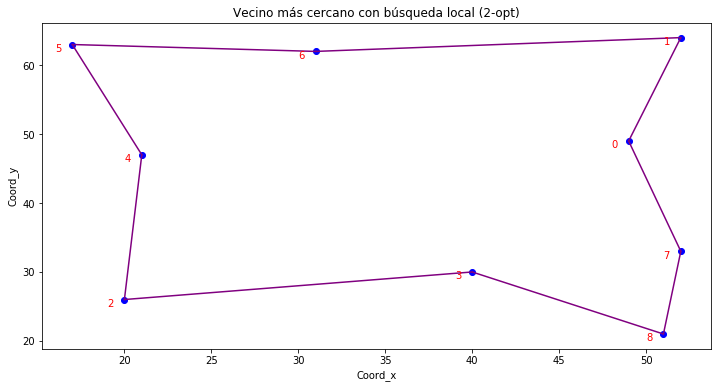

In [12]:
x=coord_x
y=coord_y
plt.figure(figsize=(12,6))
plt.scatter(x,y,color="blue")
for i in range(len(x)):
    plt.annotate(str(i), xy=(x[i],y[i]),xytext=(x[i]-1,y[i]-1),color='red')
for i in range(len(NN)-1):
    plt.plot([x[NN[i]],x[NN[i+1]]],[y[NN[i]],y[NN[i+1]]],color='purple')
plt.xlabel("Coord_x")
plt.ylabel("Coord_y")
plt.title("Vecino más cercano con búsqueda local (2-opt)")